In [ ]:
#the datase used contains detailed data of customers of a compagny

#In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database.
#I will divide customers into segments to optimize the significance of each customer to the business. 


In [185]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:/Users/EXTRA/Downloads/marketing_campaign (1).csv", sep="\t")
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [186]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [187]:

#Data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [188]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [189]:
df["Income"].fillna(df["Income"].mean(), inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [190]:
df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [191]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [192]:
df["Education"]=df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Postgraduate,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [193]:
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [194]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [195]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Relationship","Together":"Relationship","Single":"Single","Divorced":"Single", "Widow":"Single","Alone":"Single","Absurd":"Single","YOLO":"Single"})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [196]:
#combine several features into new feature

df["Total_Expense"]=df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,843


In [197]:
df["Total_children"]=df["Kidhome"]+df["Teenhome"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,0
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,2
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,1
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1341,1
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,444,3
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1241,0
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,843,1


In [198]:
df["Total_accepted_campaign"]=df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["Response"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children,Total_accepted_campaign
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,1617,0,1
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,27,2,0
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,776,0,0
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,53,1,0
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,422,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,1341,1,0
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,444,3,1
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,1241,0,1
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,843,1,0


In [199]:
df["Total_Purchases"]=df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,1617,0,1,25
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,27,2,0,6
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,776,0,0,21
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,53,1,0,8
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,422,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,1341,1,0,18
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,444,3,1,22
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,1241,0,1,19
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,843,1,0,23


In [200]:
# Generate new features using old features
# Calculate customer Age

df["Age"]=2015- df["Year_Birth"]
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,5524,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1617,0,1,25,58
1,2174,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,27,2,0,6,61
2,4141,1965,Graduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,776,0,0,21,50
3,6182,1984,Graduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,53,1,0,8,31
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,422,1,0,19,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,1341,1,0,18,48
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,444,3,1,22,69
2237,7270,1981,Graduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,1241,0,1,19,34
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,843,1,0,23,59


In [201]:
#Dropping Unnecessary columns
Columns_to_drop=["ID","Year_Birth","Z_CostContact","Z_Revenue","Dt_Customer","MntWines","MntFruits","MntMeatProducts","MntFishProducts", "MntSweetProducts" ,"MntGoldProds",
                "Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]

df.drop(columns=Columns_to_drop, axis=1, inplace= True)
df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,Graduate,Single,58138.0,58,7,0,1617,0,1,25,58
1,Graduate,Single,46344.0,38,5,0,27,2,0,6,61
2,Graduate,Relationship,71613.0,26,4,0,776,0,0,21,50
3,Graduate,Relationship,26646.0,26,6,0,53,1,0,8,31
4,Postgraduate,Relationship,58293.0,94,5,0,422,1,0,19,34
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,46,5,0,1341,1,0,18,48
2236,Postgraduate,Relationship,64014.0,56,7,0,444,3,1,22,69
2237,Graduate,Single,56981.0,91,6,0,1241,0,1,19,34
2238,Postgraduate,Relationship,69245.0,8,3,0,843,1,0,23,59


In [202]:
# Machine learning

#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Education"]=encoder.fit_transform(df["Education"])
df["Marital_Status"]=encoder.fit_transform(df["Marital_Status"])
df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,0,1,58138.0,58,7,0,1617,0,1,25,58
1,0,1,46344.0,38,5,0,27,2,0,6,61
2,0,0,71613.0,26,4,0,776,0,0,21,50
3,0,0,26646.0,26,6,0,53,1,0,8,31
4,1,0,58293.0,94,5,0,422,1,0,19,34
...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,46,5,0,1341,1,0,18,48
2236,1,0,64014.0,56,7,0,444,3,1,22,69
2237,0,1,56981.0,91,6,0,1241,0,1,19,34
2238,1,0,69245.0,8,3,0,843,1,0,23,59


In [203]:
# Features Normalization
from sklearn.preprocessing import StandardScaler
scaled_feautures= StandardScaler().fit_transform(df.values)
scaled_df=pd.DataFrame(scaled_feautures, index=df.index, columns=df.columns)
scaled_df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expense,Total_children,Total_accepted_campaign,Total_Purchases,Age
0,-0.954727,1.346874,0.235327,0.307039,0.693904,-0.097282,1.679417,-1.264505,0.621248,1.320826,0.985345
1,-0.954727,1.346874,-0.235826,-0.383664,-0.130463,-0.097282,-0.961275,1.396361,-0.501912,-1.154596,1.235733
2,-0.954727,-0.742460,0.773633,-0.798086,-0.542647,-0.097282,0.282673,-1.264505,-0.501912,0.799685,0.317643
3,-0.954727,-0.742460,-1.022732,-0.798086,0.281720,-0.097282,-0.918094,0.065928,-0.501912,-0.894025,-1.268149
4,0.877826,-0.742460,0.241519,1.550305,-0.130463,-0.097282,-0.305254,0.065928,-0.501912,0.539114,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.954727,-0.742460,0.358568,-0.107383,-0.130463,-0.097282,1.221032,0.065928,-0.501912,0.408829,0.150717
2236,0.877826,-0.742460,0.470064,0.237969,0.693904,-0.097282,-0.268717,2.726794,0.621248,0.929970,1.903435
2237,-0.954727,1.346874,0.189106,1.446700,0.281720,-0.097282,1.054951,-1.264505,0.621248,0.539114,-1.017761
2238,0.877826,-0.742460,0.679035,-1.419719,-0.954831,-0.097282,0.393948,0.065928,-0.501912,1.060255,1.068807


In [204]:
#Initiating PCA to reduce dimentions  features to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2","col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,-9.417070e-18,1.783523,-4.528779,-1.559990,-0.365779,1.392168,10.163926
col2,2240.0,5.912929e-17,1.078347,-3.313794,-0.694756,0.055158,0.716378,6.347214
col3,2240.0,3.340582e-17,1.026487,-2.936259,-0.767514,0.004454,0.710349,4.975159


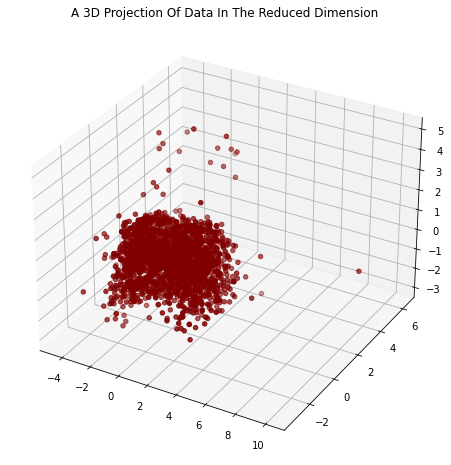

In [205]:
#A 3D Projection Of Data In The Reduced Dimension

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [214]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
wcss_points=[]
for i in range (1,20):
   model=KMeans(n_clusters=i,init ="k-means++", random_state = 1)
   model.fit(scaled_df)
wcss_points.append(model.inertia_)


In [216]:
number_of_clusters= 4
final_model= KMeans(n_clusters=number_of_clusters, random_state=1).fit(scaled_df)
prediction= final_model.predict(scaled_df)


In [ ]:

from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=4, random_state=0) 
kmeans.fit(df)



In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

In [222]:
pl = sns.scatterplot(df= df,x=df["Total_Expense"], y=df["Income"],hue=df["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Total_Expense")
plt.legend()
plt.show()

KeyError: 'clusters'